In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym
from IPython.display import display, Math
plt.style.use('../ml/deeplearning.mplstyle')
from pypalettes import load_cmap


In [14]:
row_vec = np.array([4,2])
col_vec = np.array([[-2],[3]])

In [15]:
print(row_vec)
print(col_vec)

[4 2]
[[-2]
 [ 3]]


In [16]:
display(Math(sym.latex(sym.sympify(row_vec))))
display(Math(sym.latex(sym.sympify(col_vec))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Graphing vectors

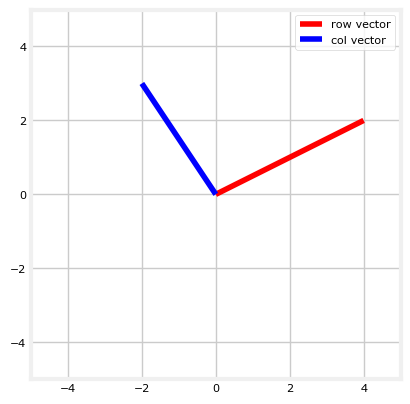

In [23]:
flat_col_vec = np.array(col_vec).flatten()
plt.plot([0, row_vec[0]], [0, row_vec[1]], 'r', label='row vector')
plt.plot([0, flat_col_vec[0]], [0, flat_col_vec[1]], 'b', label='col vector')
plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()
plt.show()


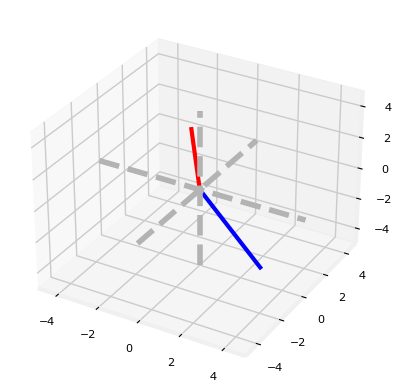

In [24]:
# learned from https://www.udemy.com/course/math-with-python/learn/lecture/16335140#overview

v = np.array([3, 0, -4])
w = np.array([-1, 1, 3])
# plt.plot([0, r_vec[0]], [0, r_vec[1]], 'r', label='row vector')
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,v[0]],[0,v[1]],[0,v[2]],'b',linewidth=3)
ax.plot([0,w[0]],[0,w[1]],[0,w[2]],'r',linewidth=3)

# origin lines
ax.plot([-5,5],[0,0],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[-5,5],[0,0],'--',color=[.7,.7,.7])
ax.plot([0,0],[0,0],[-5,5],'--',color=[.7,.7,.7])

ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)
plt.show()


## Adding and multiplying vectors

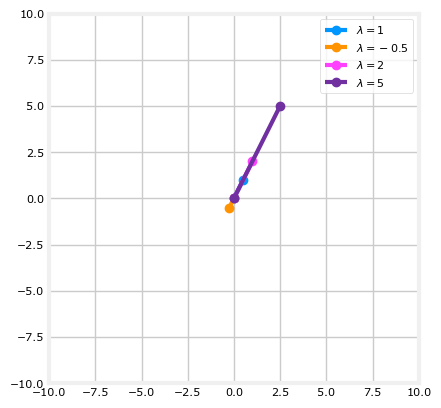

In [22]:
# Vector multiplication
v = np.array([.5,1])
s = [1,-.5,2,5]

for si in s:
    sv = si * v
    plt.plot([0,sv[0]],[0,sv[1]],'-o',linewidth=3,label=f'$\\lambda={si}$')
    
plt.axis('square')
plt.axis([-10, 10, -10, 10])

plt.grid()
plt.legend()
         
plt.show()

## Adding Vectors

In [18]:
v1 = np.array([-1,2])
v2 = np.array([1,1])

# 3 different ways to add vectors
v3a = v1+v2
v3b = np.add(v1,v2)

# following doesn't use vectorization
v3c = np.zeros(2)
for i in range(0,2):
    v3c[i] = v1[i] + v2[i]

In [19]:
print(v3a,v3b,v3c)

[0 3] [0 3] [0. 3.]


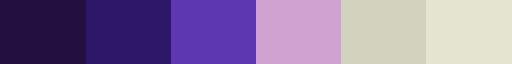

In [17]:
cmap = load_cmap('random')
cmap

In [18]:

# Get colors from the cmap, scale by number of lines
colors = cmap(range(len([row_vec, flat_col_vec])))

<IPython.core.display.Math object>

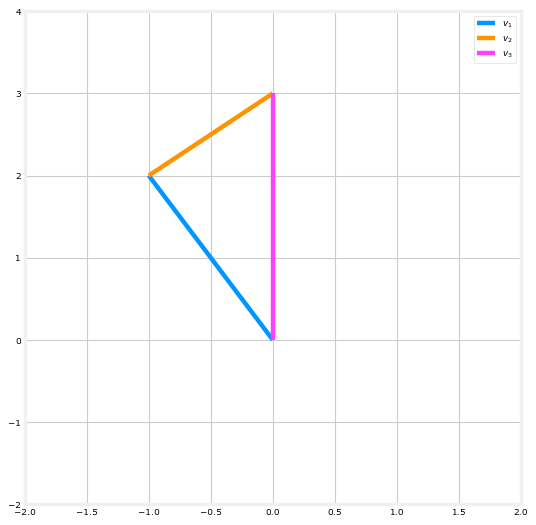

In [58]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
v1 = np.array([-1, 2])
v2 = np.array([1, 1])
v3 = v1+v2

ax.plot([0, v1[0]], [0, v1[1]], label='$v_1$')
ax.plot([0, v2[0]]+v1[0], [0, v2[1]]+v1[1], label='$v_2$')
ax.plot([0, v3[0]], [0, v3[1]], label='$v_3$')

display(Math(f'{sym.sympify(v1)}+{sym.sympify(v2)}+{sym.sympify(v3)}'))

ax.axis([-2, 2, -2, 4])
ax.legend()
ax.grid()                  # Grid line color

plt.show()


## Dot Product

In [68]:
v = np.arange(10,20,3)
w = np.arange(5,15,3)

print(v)
print(w)

dp1 = 0
for i in range(len(v)):
    dp1 = dp1 + v[i] * w[i]
    
dp2 = np.sum(np.multiply(v, w))
dp3 = np.dot(v, w)

print(dp1)
print(dp2)
print(dp3)

[10 13 16 19]
[ 5  8 11 14]
596
596
596


In [123]:
def dotify(v: np.ndarray, w: np.ndarray) -> int:
    v = np.squeeze(vec1)
    w = np.squeeze(vec2)
    if len(v) != len(w):
        raise ValueError("Vectors must have the same length")
    
    display(Math(f'v ^T w={np.dot(v, w)}'))
 

In [124]:
vec1 = np.random.randn(1,10)
vec2 = np.random.randn(1,10)
print(vec1, vec2)


dotify(vec1, vec2)

[[-1.72081183  0.60056772  1.10743594  0.46197925 -0.6115765  -0.58039223
   0.34605525  0.57112117  0.7335356   0.24466644]] [[ 0.21282246  0.67887587  0.76169341 -1.44367589 -0.64093761  1.69337335
   0.78545239  0.24372284  1.26334066 -0.15961751]]


<IPython.core.display.Math object>

In [111]:
dp1

596

In [79]:
type(v1)

numpy.ndarray

## Correlation coeffecient
$r_{xy} = \frac{\sum^{n}_{i=1} (x_{i} - \overline{x})(y_{i} - \overline{y})}{\sqrt{\sum^{n}_{i=1}(x_{i} - \overline{x})^{2} \sqrt{\sum^{n}_{i=1}(y_{i} - \overline{y})^{2}$



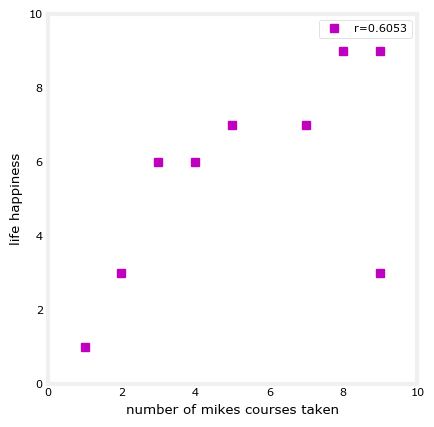

In [148]:
mikes_courses = [4,5,8,2,9,9,1,3,7]
life_happiness = [6,7,9,3,9,3,1,6,7]

# mean-center
m = mikes_courses - np.mean(mikes_courses)
l = life_happiness - np.mean(life_happiness)

# compute correlation
numer = np.dot(m, l)
denom = np.sqrt(np.dot(m, m)) * np.sqrt(np.dot(l, l))
r1 = numer/denom
r2 = np.corrcoef(m, l)[1][0]
plt.plot(mikes_courses, life_happiness, 'ms', label=f'r={np.round(r1,4)}')
plt.axis([0., 10., 0., 10.])
plt.legend()
plt.gca().set_aspect('equal')
plt.xlabel("number of mikes courses taken")
plt.ylabel("life happiness")
plt.show()

In [138]:
r1

0.6053020602414296

In [139]:
r2

0.60530206024143

## The outer product


In [167]:
v1 = np.random.randn(50)
v2 = np.random.randn(80)

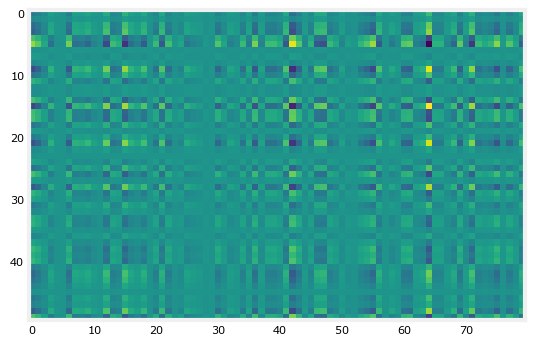

In [171]:
op = np.outer(v1, v2)
plt.imshow(op)
plt.show()

In [172]:
o1 = np.outer(v1, v2)
o2 = np.outer(v2, v1)

In [175]:
o1 == o2.transpose()

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [176]:
o2.transpose()

array([[-1.4768343 , -1.03489445, -0.39560123, ..., -0.95188079,
        -0.31263082,  0.9286117 ],
       [-0.51257391, -0.35918715, -0.13730374, ..., -0.33037509,
        -0.10850669,  0.32229894],
       [-2.23795271, -1.56824962, -0.59948285, ..., -1.44245308,
        -0.47375185,  1.40719177],
       ...,
       [-0.90530794, -0.63439626, -0.24250583, ..., -0.58350841,
        -0.19164449,  0.56924433],
       [-2.93963962, -2.05995806, -0.7874445 , ..., -1.89471932,
        -0.62229184,  1.84840219],
       [ 2.79279325,  1.95705519,  0.7481086 , ...,  1.80007076,
         0.59120596, -1.75606735]])

In [177]:
o1

array([[-1.4768343 , -1.03489445, -0.39560123, ..., -0.95188079,
        -0.31263082,  0.9286117 ],
       [-0.51257391, -0.35918715, -0.13730374, ..., -0.33037509,
        -0.10850669,  0.32229894],
       [-2.23795271, -1.56824962, -0.59948285, ..., -1.44245308,
        -0.47375185,  1.40719177],
       ...,
       [-0.90530794, -0.63439626, -0.24250583, ..., -0.58350841,
        -0.19164449,  0.56924433],
       [-2.93963962, -2.05995806, -0.7874445 , ..., -1.89471932,
        -0.62229184,  1.84840219],
       [ 2.79279325,  1.95705519,  0.7481086 , ...,  1.80007076,
         0.59120596, -1.75606735]])